In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
yelp = pd.read_csv('yelp.csv')

In [ ]:
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [ ]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [ ]:
yelp.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


In [ ]:
yelp['text_length'] = yelp['text'].apply(len)

In [ ]:
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text_length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,76
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469


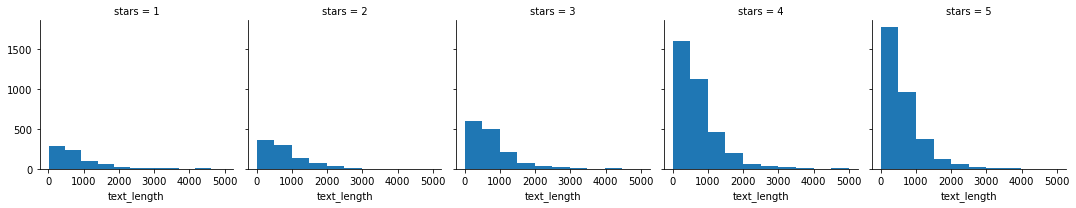

In [ ]:
g = sns.FacetGrid(yelp,col='stars')
g.map(plt.hist,'text_length')

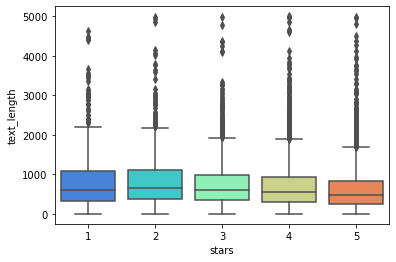

In [ ]:
sns.boxplot(x='stars',y='text_length',data=yelp,palette='rainbow')

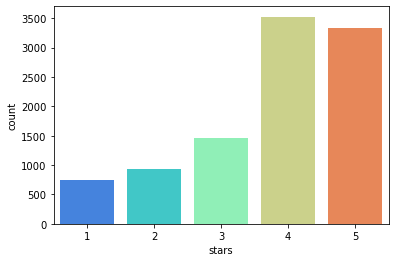

In [ ]:
sns.countplot(x='stars',data=yelp,palette='rainbow')

In [ ]:
yelp_class = yelp[(yelp.stars==1) | (yelp.stars==5)]

In [ ]:
X = yelp_class['text']
y = yelp_class['stars']

In [ ]:
X

0       My wife took me here on my birthday for breakf...
1       I have no idea why some people give bad review...
3       Rosie, Dakota, and I LOVE Chaparral Dog Park!!...
4       General Manager Scott Petello is a good egg!!!...
6       Drop what you're doing and drive here. After I...
                              ...                        
9990    Yes I do rock the hipster joints.  I dig this ...
9991    Only 4 stars? \n\n(A few notes: The folks that...
9992    I'm not normally one to jump at reviewing a ch...
9994    Let's see...what is there NOT to like about Su...
9999    4-5 locations.. all 4.5 star average.. I think...
Name: text, Length: 4086, dtype: object

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [ ]:
X = cv.fit_transform(X)

In [ ]:
mat=X.toarray()

In [ ]:
len(mat)

4086

In [ ]:
print(X)

  (0, 11265)	2
  (0, 18735)	1
  (0, 17406)	1
  (0, 10635)	1
  (0, 8161)	2
  (0, 11821)	3
  (0, 1984)	1
  (0, 6864)	1
  (0, 2364)	1
  (0, 937)	8
  (0, 9114)	9
  (0, 18517)	8
  (0, 6123)	3
  (0, 17126)	10
  (0, 18585)	1
  (0, 12505)	1
  (0, 18672)	1
  (0, 10300)	2
  (0, 15422)	1
  (0, 12016)	1
  (0, 12054)	1
  (0, 17134)	4
  (0, 7715)	1
  (0, 921)	1
  (0, 407)	1
  :	:
  (4085, 9817)	1
  (4085, 10088)	1
  (4085, 9127)	1
  (4085, 10873)	1
  (4085, 2154)	1
  (4085, 183)	1
  (4085, 10907)	1
  (4085, 17416)	1
  (4085, 6370)	1
  (4085, 3314)	1
  (4085, 3329)	1
  (4085, 14423)	1
  (4085, 1442)	1
  (4085, 16134)	1
  (4085, 15944)	1
  (4085, 6651)	1
  (4085, 12298)	1
  (4085, 543)	1
  (4085, 17700)	1
  (4085, 2515)	1
  (4085, 189)	1
  (4085, 9624)	1
  (4085, 5510)	1
  (4085, 836)	1
  (4085, 15962)	1


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [ ]:
nb.fit(X_train,y_train)

MultinomialNB()

In [ ]:
predictions = nb.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[159  69]
 [ 22 976]]


              precision    recall  f1-score   support

           1       0.88      0.70      0.78       228
           5       0.93      0.98      0.96       998

    accuracy                           0.93      1226
   macro avg       0.91      0.84      0.87      1226
weighted avg       0.92      0.93      0.92      1226



In [ ]:
from sklearn.feature_extraction.text import  TfidfTransformer

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
pipeline = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [ ]:
X = yelp_class['text']
y = yelp_class['stars']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

In [ ]:
# May take some time
pipeline.fit(X_train,y_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [ ]:
predictions = pipeline.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[  0 228]
 [  0 998]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       228
           5       0.81      1.00      0.90       998

    accuracy                           0.81      1226
   macro avg       0.41      0.50      0.45      1226
weighted avg       0.66      0.81      0.73      1226



C:\Users\nilan\.conda\envs\py36\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
